### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [240]:
data = pd.read_csv('data/coupons.csv')

In [241]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [242]:
#show max width for viewing all columns
pd.set_option('display.max_colwidth', None)

#review about the data
display(data.info())
display(data.describe())
display(data.describe(include='object'))

#displays all unique values in the data_mod dataframe columns
display(pd.Series({col: data[col].unique() for col in data}))
#check if there are any NaN values in the data
display(data.isna().mean() * 100)
#check if there are any duplicates in the data
display('duplicated: ' + data.duplicated().sum().astype(str))
#check the correlation between the nemeric columns in the data
display(data.corr(method='pearson', numeric_only=True))


#observations
# 1. 74 duplicates
# 2. 99+% of car value is NaN or missing
# 3. CoffeeHouse, RestaurantLessThan20, CarryAway, Bar and Restaurant20To50 has 0.84 ~ 1.71# NaN values.  
#   Likely not impacting much whether by keeping/removing.  Should keep for other data integrity as NaN does not impact aggregate other than not counting them.
# 4. CoffeeHouse, RestaurantLessThan20, CarryAway, Bar and Restaurant20To50 can be changed to numeric values for better analysis.
# 5. Coupon values can be pivoted columns for easier aggregation and analysis.  Should match the existing column names for easier reference.
# 6. 'age' field can change to numeric values for better analysis.
# 7. 'passanger' spelled passenger incorrectly.  Should be corrected to passenger for easier reference. 
# 8. 'income' field can be changed to numeric values for better analysis.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

None

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


destination                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [No Urgent Place, Home, Work]
passanger                                                                                                                                                                                                                                                                                                                                             

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

'duplicated: 74'

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [243]:
#should drop 74 duplicates
#99+% of car value is missing, so should drop it.
data_mod = data.drop_duplicates()
data_mod = data_mod.drop(columns=['car'])

data_mod_NaN_count = data_mod[data_mod['Bar'].isna() | data_mod['CoffeeHouse'].isna() | data_mod['CarryAway'].isna() | data_mod['RestaurantLessThan20'].isna() | data_mod['Restaurant20To50'].isna()].shape[0] 
data_mod_count = data_mod.shape[0]
print(data_mod_NaN_count)
print(data_mod_count)
print('NaN rows ratio: ' + str(data_mod_NaN_count / data_mod_count * 100))
Y_count = data_mod[data_mod['Bar'].isna() | data_mod['CoffeeHouse'].isna() | data_mod['CarryAway'].isna() | data_mod['RestaurantLessThan20'].isna() | data_mod['Restaurant20To50'].isna()]['Y'].sum()
print('Y % with NaN rows: ' + str(Y_count/data_mod_NaN_count * 100) + '%')
print(data_mod['coupon'].value_counts() / data_mod['coupon'].count() * 100)

#NaN #:
#CoffeeHouse              1.710817
#RestaurantLessThan20     1.024913
#CarryAway                1.190476
#Bar                      0.843582
#Restaurant20To50         1.490066

#coupon value distribution %:
#Coffee House             31.633624
#Restaurant(<20)          22.038065
#Carry out & Take away    18.588422
#Bar                      15.939730
#Restaurant(20-50)        11.800159


# NaN may be more useful than 0, so keeping them for now.  Will decide later if needed to drop them or change to 0 by looking at the data a bit further.
   
    # Y% with NaN rows similar to Y mean in all data and less than 5% of data, 
    # but coupon value distribution is differently ditributed and fields like CarryAway and Bar 
    # maybe impacted more by removing the rows and other meaningful categorical fields values can be removed, so keeping with value 0.
        # data_mod.fillna({'Bar': 0, 'CoffeeHouse': 0, 'CarryAway': 0, 'RestaurantLessThan20': 0, 'Restaurant20To50': 0}, inplace=True)
        # this may skew the data due to 'never' would be 0 already.

        #not implementing dropping NaN rows
            #data_mod.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)



# we can probably change this to int value, adding additional columns for now instead of overwriting the original fields
#Bar                     [never, less1, 1~3, gt8, nan, 4~8]
#CoffeeHouse             [never, less1, 4~8, 1~3, gt8, nan]
#CarryAway               [nan, 4~8, 1~3, gt8, less1, never]
#RestaurantLessThan20    [4~8, 1~3, less1, gt8, nan, never]
#Restaurant20To50        [1~3, less1, never, gt8, 4~8, nan]
data_mod['Bar_Num'] = data_mod['Bar'].map({'never': 0, 'less1': 1, '1~3': 2, 'gt8': 8, np.nan: np.nan, '4~8': 6})
data_mod['CoffeeHouse_Num'] = data_mod['CoffeeHouse'].map({'never': 0, 'less1': 1, '4~8': 6, '1~3': 2, 'gt8': 8, np.nan: np.nan})
data_mod['CarryAway_Num'] = data_mod['CarryAway'].map({np.nan: np.nan, '4~8': 6, '1~3': 2, 'gt8': 8, 'less1': 1, 'never': 0})
data_mod['RestaurantLessThan20_Num'] = data_mod['RestaurantLessThan20'].map({'4~8': 6, '1~3': 2, 'less1': 1, 'gt8': 8, np.nan: np.nan, 'never': 0})
data_mod['Restaurant20To50_Num'] = data_mod['Restaurant20To50'].map({'1~3': 2, 'less1': 1, 'never': 0, 'gt8': 8, '4~8': 6, np.nan: np.nan})
data_mod['coupon'] = data_mod['coupon'].map({'Bar': 'Bar', 'Carry out & Take away': 'CarryAway', 'Coffee House': 'CoffeeHouse', 'Restaurant(20-50)': 'Restaurant20To50', 'Restaurant(<20)': 'RestaurantLessThan20'})

#Also, adding coupon values as columns for easier aggregation and analysis
data_coupon_pivot = pd.get_dummies(data_mod['coupon'], prefix='coupon')
data_mod = data_mod.join(other=data_coupon_pivot, how='inner')

#confirming merge done correctly
display(data_mod[['coupon', 'coupon_Bar', 'coupon_CarryAway', 'coupon_CoffeeHouse', 'coupon_Restaurant20To50', 'coupon_RestaurantLessThan20']].head(100))
 
#change age to numeric values as new age_num column
#[21, 46, 26, 31, 41, 50plus, 36, below21]
data_mod['age_num'] = data_mod['age'].map({'below21': 0, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 50})

#rename passanger (wrong spelling) column to passenger
data_mod.rename(columns={'passanger': 'passenger'}, inplace=True)

#change income to numeric values as new income_num column
#[$37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500]
data_mod['income_num'] = data_mod['income'].map({'Less than $12500': 0, '$12500 - $24999': 18750, '$25000 - $37499': 31250, '$37500 - $49999': 43750, '$50000 - $62499': 56250, '$62500 - $74999': 68750, '$75000 - $87499': 81250, '$87500 - $99999': 93750, '$100000 or More': 100000}) 


#review again after data changes
display(data_mod.info())
display(data_mod.describe())
display(data_mod.describe(include='object'))

#displays all unique values in the data_mod dataframe columns
display(pd.Series({col: data_mod[col].unique() for col in data_mod}))

#left the NaN values in the data still and not much correlation to 'Y" field , but can be dropped if needed later.
display(data_mod.isna().mean() * 100)

#shows no duplicates now
display('duplicated: ' + data_mod.duplicated().sum().astype(str))

#most of the field against 'Y' field did not have a strong correlation (mostly less than 0.10), but the coupon field were relatively stronger specifically Bar (-0.14) and CarryAway (0.16) values. 
display(data_mod.corr(method='pearson', numeric_only=True))








603
12610
NaN rows ratio: 4.781919111816019
Y % with NaN rows: 55.05804311774462%
coupon
Coffee House             31.633624
Restaurant(<20)          22.038065
Carry out & Take away    18.588422
Bar                      15.939730
Restaurant(20-50)        11.800159
Name: count, dtype: float64


,coupon,coupon_Bar,coupon_CarryAway,coupon_CoffeeHouse,coupon_Restaurant20To50,coupon_RestaurantLessThan20
0,RestaurantLessThan20,False,False,False,False,True
1,CoffeeHouse,False,False,True,False,False
2,CarryAway,False,True,False,False,False
3,CoffeeHouse,False,False,True,False,False
4,CoffeeHouse,False,False,True,False,False
...,...,...,...,...,...,...
95,RestaurantLessThan20,False,False,False,False,True
96,CoffeeHouse,False,False,True,False,False
97,RestaurantLessThan20,False,False,False,False,True
98,CoffeeHouse,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   destination                  12610 non-null  object 
 1   passenger                    12610 non-null  object 
 2   weather                      12610 non-null  object 
 3   temperature                  12610 non-null  int64  
 4   time                         12610 non-null  object 
 5   coupon                       12610 non-null  object 
 6   expiration                   12610 non-null  object 
 7   gender                       12610 non-null  object 
 8   age                          12610 non-null  object 
 9   maritalStatus                12610 non-null  object 
 10  has_children                 12610 non-null  int64  
 11  education                    12610 non-null  object 
 12  occupation                   12610 non-null  object 
 13  income               

None

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Num,CoffeeHouse_Num,CarryAway_Num,RestaurantLessThan20_Num,Restaurant20To50_Num,age_num,income_num
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12503.000000,12393.000000,12460.000000,12481.000000,12421.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565,1.406382,2.363431,3.945987,3.553962,1.533934,31.423473,51557.791435
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434,1.987969,2.569642,2.529807,2.464620,1.629611,11.894594,31212.435679
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,21.000000,31250.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,31.000000,43750.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,6.000000,6.000000,2.000000,41.000000,81250.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,50.000000,100000.000000


,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12503,12393,12460,12481,12421
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,CoffeeHouse,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1
freq,6266,7248,10011,3220,3989,7031,6469,2642,5068,4325,1861,2006,5178,3362,4645,5356,6041


destination                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                [No Urgent Place, Home, Work]
passenger                                                                                                                                                                                                                                                                                                                                      

destination                    0.000000
passenger                      0.000000
weather                        0.000000
temperature                    0.000000
time                           0.000000
coupon                         0.000000
expiration                     0.000000
gender                         0.000000
age                            0.000000
maritalStatus                  0.000000
has_children                   0.000000
education                      0.000000
occupation                     0.000000
income                         0.000000
Bar                            0.848533
CoffeeHouse                    1.720856
CarryAway                      1.189532
RestaurantLessThan20           1.022998
Restaurant20To50               1.498810
toCoupon_GEQ5min               0.000000
toCoupon_GEQ15min              0.000000
toCoupon_GEQ25min              0.000000
direction_same                 0.000000
direction_opp                  0.000000
Y                              0.000000


'duplicated: 0'

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Num,CoffeeHouse_Num,CarryAway_Num,RestaurantLessThan20_Num,Restaurant20To50_Num,coupon_Bar,coupon_CarryAway,coupon_CoffeeHouse,coupon_Restaurant20To50,coupon_RestaurantLessThan20,age_num,income_num
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393,0.003795,-0.021539,0.007312,0.035162,-0.031925,-0.128863,-0.132817,0.169362,0.028215,0.026474,-0.011861,-0.026498
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056,-0.197086,0.026290,-0.029690,-0.045083,0.006199,0.016636,0.016711,-0.037207,0.016569,-0.001526,0.433689,0.100515
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693,-0.018396,-0.003045,-0.009331,-0.008141,-0.009375,0.090695,0.065641,-0.055999,0.054483,-0.121274,0.035360,0.022091
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139,0.000164,0.002870,-0.006102,-0.010735,-0.008637,0.187254,-0.031795,-0.081363,-0.045008,-0.009210,-0.002135,-0.003900
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932,-0.009270,0.002899,0.000753,-0.011741,-0.003236,-0.006977,0.142167,-0.045950,-0.038097,-0.046059,-0.035380,-0.027012
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932,0.009270,-0.002899,-0.000753,0.011741,0.003236,0.006977,-0.142167,0.045950,0.038097,0.046059,0.035380,0.027012
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000,0.057496,0.081153,0.027667,0.042876,0.068983,-0.138540,0.160325,-0.094664,-0.093052,0.150508,-0.059186,-0.029517
Bar_Num,0.003795,-0.197086,NaN,-0.018396,0.000164,-0.009270,0.009270,0.057496,1.000000,0.226785,0.174746,0.168846,0.253492,-0.016313,-0.004657,0.013930,-0.003319,0.005727,-0.109900,0.014325
CoffeeHouse_Num,-0.021539,0.026290,NaN,-0.003045,0.002870,0.002899,-0.002899,0.081153,0.226785,1.000000,0.224701,0.281889,0.246868,0.001690,0.007396,-0.009831,0.002632,0.000538,-0.041880,-0.022819


4. What proportion of the total observations chose to accept the coupon?



In [340]:
#Taking mean shows the acceptance rate of the coupon in this case.
ratio = data_mod['Y'].mean() * 100
print(f'proportion of the total observations chose to accept the coupon: {ratio:.2f}%' )


proportion of the total observations chose to accept the coupon: 56.76%


5. Use a bar plot to visualize the `coupon` column.

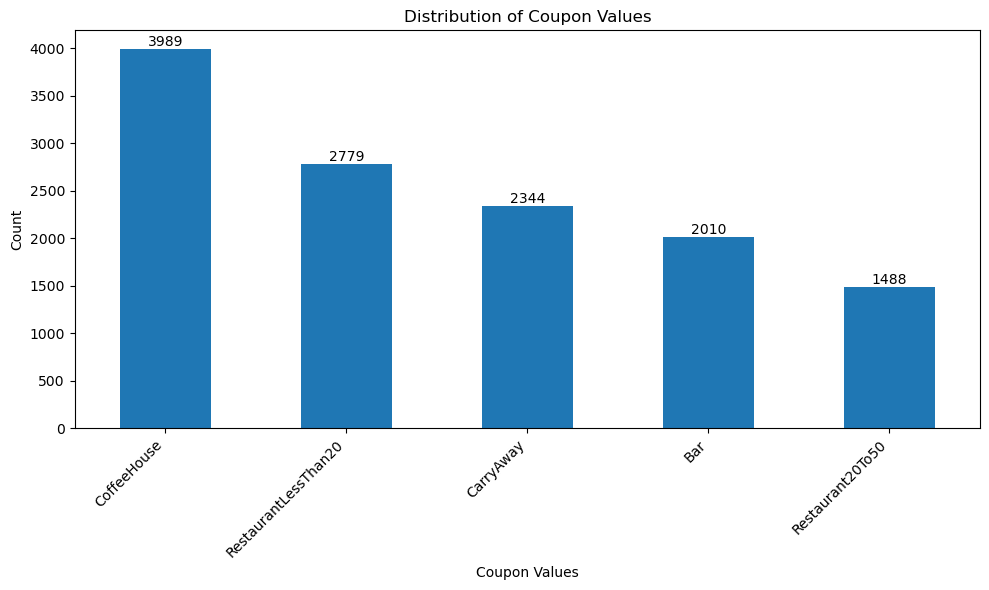

In [245]:
#take the count of each coupon value so the counts can be used for Y and X can be the coupon values.
value_counts = data_mod['coupon'].value_counts()
# using dataframe to add barplot
ax = value_counts.plot(kind='bar',
                      figsize=(10, 6),
                      title='Distribution of Coupon Values',
                      xlabel='Coupon Values',
                      ylabel='Count')


# using seaborn to add barplot
#ax = sns.barplot(x=value_counts.index, y=value_counts.values)

# Customize the plot
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.show()


6. Use a histogram to visualize the temperature column.

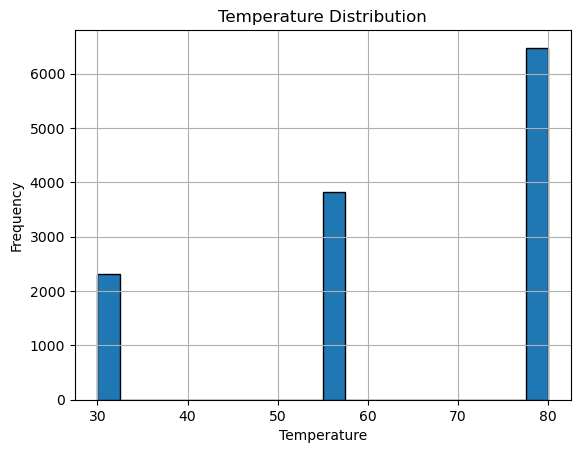

In [246]:
#using dataframe to plot the histogram of the temperature column
ax = data_mod['temperature'].hist(bins=20, edgecolor='black')

#using seaborn to plot the histogram of the temperature column
#sns.histplot(data_mod['temperature'], bins=20, color='black', kde=True)


plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [247]:
df_bar = data_mod[data_mod['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [248]:
bar_coupon_proportion =df_bar['Y'].mean() * 100
print(f'Accepted bar coupon proportion: {bar_coupon_proportion:.2f}% and rejected: {100 - bar_coupon_proportion:.2f}%')


Accepted bar coupon proportion: 41.00% and rejected: 59.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [249]:
#print(df_bar[df_bar['Bar_Num'] < 3]['Y'].count()) #prints 1790
#print(df_bar[df_bar['Bar'].isin(['never', 'less1', '1~3'])]['Y'].count()) #prints 1790
#print("Total rows in df_bar:", len(df_bar))

 
df_bar_grouped_less_3 = df_bar.groupby((df_bar['Bar_Num'] < 3))['Y'].mean() * 100

#print(df_bar_grouped_less_3)
print(f'Accepted Bar coupon proportion with less than 3 per month: {df_bar_grouped_less_3[True]:.2f}% and rejected: {100 - df_bar_grouped_less_3[True]:.2f}%')




Accepted Bar coupon proportion with less than 3 per month: 37.04% and rejected: 62.96%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [250]:
#easier if the age was a number, so changed it to numeric values above

df_bar_grouped_more_1_and_age_greater_25 = df_bar.groupby((df_bar['Bar_Num'] > 1) & (df_bar['age_num'] > 25))['Y'].mean() * 100
#print(df_bar_grouped_more_1_and_age_greater_25)
print(f'Accepted Bar coupon proportion with more than 1 per month and age greater than 25: {df_bar_grouped_more_1_and_age_greater_25[True]:.2f}% and rejected: {100 - df_bar_grouped_more_1_and_age_greater_25[True]:.2f}%')

Accepted Bar coupon proportion with more than 1 per month and age greater than 25: 69.52% and rejected: 30.48%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [251]:
# [Alone, Friend(s), Kid(s), Partner]
# [Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry]

df_bar_grouped_more1_nokid_jobfff = df_bar.groupby((df_bar['Bar_Num'] > 1) & (df_bar['passenger'] != 'Kid(s)') & (df_bar['occupation'] != 'Farming Fishing & Forestry'))['Y'].mean() * 100
#print(df_bar_grouped_more1_nokid_jobfff)
#print(df_bar[df_bar['occupation'] == 'Farming Fishing & Forestry']['occupation'].count())
print(f'Accepted Bar coupon proportion with more than 1 per month and no kids and job not in Farming Fishing & Forestry: {df_bar_grouped_more1_nokid_jobfff[True]:.2f}% and rejected: {100 - df_bar_grouped_more1_nokid_jobfff[True]:.2f}%')


Accepted Bar coupon proportion with more than 1 per month and no kids and job not in Farming Fishing & Forestry: 71.32% and rejected: 28.68%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [252]:
#[Unmarried partner, Single, Married partner, Divorced, Widowed]
#[21, 46, 26, 31, 41, 50, 36, 0]
#[6.0, 2.0, 1.0, 8.0, nan, 0.0]
#[$37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500]
#it will be easier to make income numberic, so changed to numberic value above.

groupby_clause1 = (df_bar['Bar_Num'] > 1) & (df_bar['passenger'] != 'Kid(s)') & (df_bar['maritalStatus'] != 'Widowed')
groupby_clause2 = (df_bar['Bar_Num'] > 1) & (df_bar['age_num'] < 30)
groupby_clause3 = (df_bar['RestaurantLessThan20_Num'] > 4) & (df_bar['income_num'] < 50000)
final_clause = groupby_clause1 | groupby_clause2 | groupby_clause3

df_bar_grouped_final = df_bar.groupby(final_clause)['Y'].mean() * 100

#print(df_bar_grouped_final)
print(f'Bar coupon proportion per specified conditions: {df_bar_grouped_final[True]:.2f}% and rejected: {100 - df_bar_grouped_final[True]:.2f}%')



Bar coupon proportion per specified conditions: 58.89% and rejected: 41.11%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Before Independent Analysis (For Bar Coupon)
* There are less drivers likely to accept the coupon that goes to the bar less than 3 time compare to that goes to at least once as the acceptance rate dramatically improves for the drivers that goes to the bar at least once.   
* And if the driver is over 25, it adds a ted bit like 1% of accepting the coupon   
* And if the driver has no kids, it adds about another 2% (up to 71.32%).  Additional condition of 'Farming Fishing & Forestry' job would not have been a big impact only 9 people in the dataset would have that job.
* And if the driver is less than age of 30 that goes to the bar at least once increases the acceptance rate along with having no kid and not widowed.
* However, when the additional dataset for the driver that uses the cheap restaurant more than 4 times a month and making less than 50K, the acceptance rate dropped to less than 60%.
* The drivers going to cheap restaurant and making less than 50k look to less likely to accept the coupons
* So, the drivers who goes to the bar at least once automatically increase the chance of accepting the coupon very high close to 70% and adding other conditions like having no kids and not widowed increased the rate a little more.  While the age condition of greater than 25 increased a bit, age less than 30 increased also a bit as well which make it look like age doesn't matter much. 
* To project who would accept the bar coupon, I would target the drivers who go to the bar at least once a month first as a primary target group and more specifically target that do not have kids and are not widowed among drivers within the primary target group.


# After Independent Analysis (For RestaurantLessThan20)
* temperature - 80 degrees is the best time
* time - 2PM and 6PM are the peak time
* expiration - Expiration with 1d is more likely to be accepted/used
* gender - Not that significant difference between male and female
* age - Age between 21 and 26 have the much higher acceptance
* maritalStatus - Other than divorce or widowed, more coupons are distributed and highly accepted.
* has_children - Not affecting acceptance rate significantly whether there is child or not.
* education - "some college - no degree" and "Bachelors degree" has more distribution and higher acceptance
* occupations - Too many occupations, but "sales & related" job stands out and has significant acceptance rate and it's likely because sales folks usually are outside and busy for quick bites.
* income - 25k ~ 62.5k range has more distribution and higher acceptance rates.
* direction - My initial guess was the same direction would have higher acceptance, but it was opposite on this dataset.
* I tried to target the group that would result in over 90% acceptance and here are two groups
* If the driver is going to 'no urgent place' with friend(s) on sunny day over 50 degrees temperature around 2PM lunch time, given coupon with 1 day expiration, the driver has 97% chance of accepting.
* There are few people that actually fall in this category, less than 3% (77/2779), so tried to add more people using difference conditions.
* If the driver goes to cheap restaurant more than 3 times a month and has 'some college - no degree' and coupon was sent around 2pm and 6pm, the acceptance rate goes to 90.10%.  This group of drivers is a little over 6% of the population (173/2779).
* Combining two group resulted in 92.34% acceptance rate and about 9.4% of the population.
* In general when all other factors are combined, you already know that it's about 70% acceptance for RestaurantLessThan20, but you can see which factors can result in higher acceptance rate.
* Within driver group who goes to cheap restaurance, if the drivers go to Restaurant20To50, CarryAway, CoffeeHouse or Bar at least once, then they are likely also to accept the coupons with over 70% acceptance rate.  So the coupons for other restaurants should be sent to this group as well for the 70% acceptance rate.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

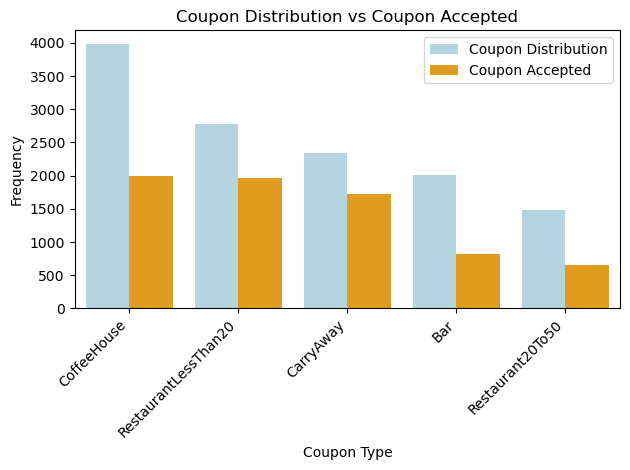

In [341]:
#Let's see what type of coupons are accepted by the drivers more vs distribution of the coupon values.

data_coupon_per_y = data_mod.query('Y == 1')['coupon'].value_counts()
data_coupon_distribution = data_mod['coupon'].value_counts()

#print(data_coupon_per_y)
#print(data_coupon_distribution)
#print(data_coupon_per_y / data_coupon_distribution * 100)

#data_nochange = data_mod[['coupon', 'Y']].groupby(['coupon']).sum()
#print(data_nochange)

chart_df = pd.DataFrame({'Coupon Distribution': data_coupon_distribution, 'Coupon Accepted': data_coupon_per_y})

melted_df = chart_df.reset_index().melt(
    id_vars='coupon',  # your index becomes a column
    value_vars=['Coupon Distribution', 'Coupon Accepted'],
    var_name='Category',
    value_name='Count'
)
#print(melted_df)

# Create the grouped bar plot
ax= sns.barplot(
    data=melted_df,
    x='coupon',         # x-axis: CoffeeHouse, RestaurantLessThan20, etc.
    y='Count',          # y-axis: the values
    hue='Category',     # grouping by columns
    palette=['lightblue', 'orange']
)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel("Coupon Type")
plt.ylabel("Frequency")
plt.title('Coupon Distribution vs Coupon Accepted')
plt.legend()
plt.tight_layout()
plt.show()


#Looking at the chart, while sending most coupons for CoffeeHouse, the acceptance rate is lower than the other coupons.
#Also, while less coupons are sent for Bar, the acceptance rate is lower than the other coupons as well.
#RestaurantLessThan20 and CarryAway have a higher acceptance rate than the other coupons.


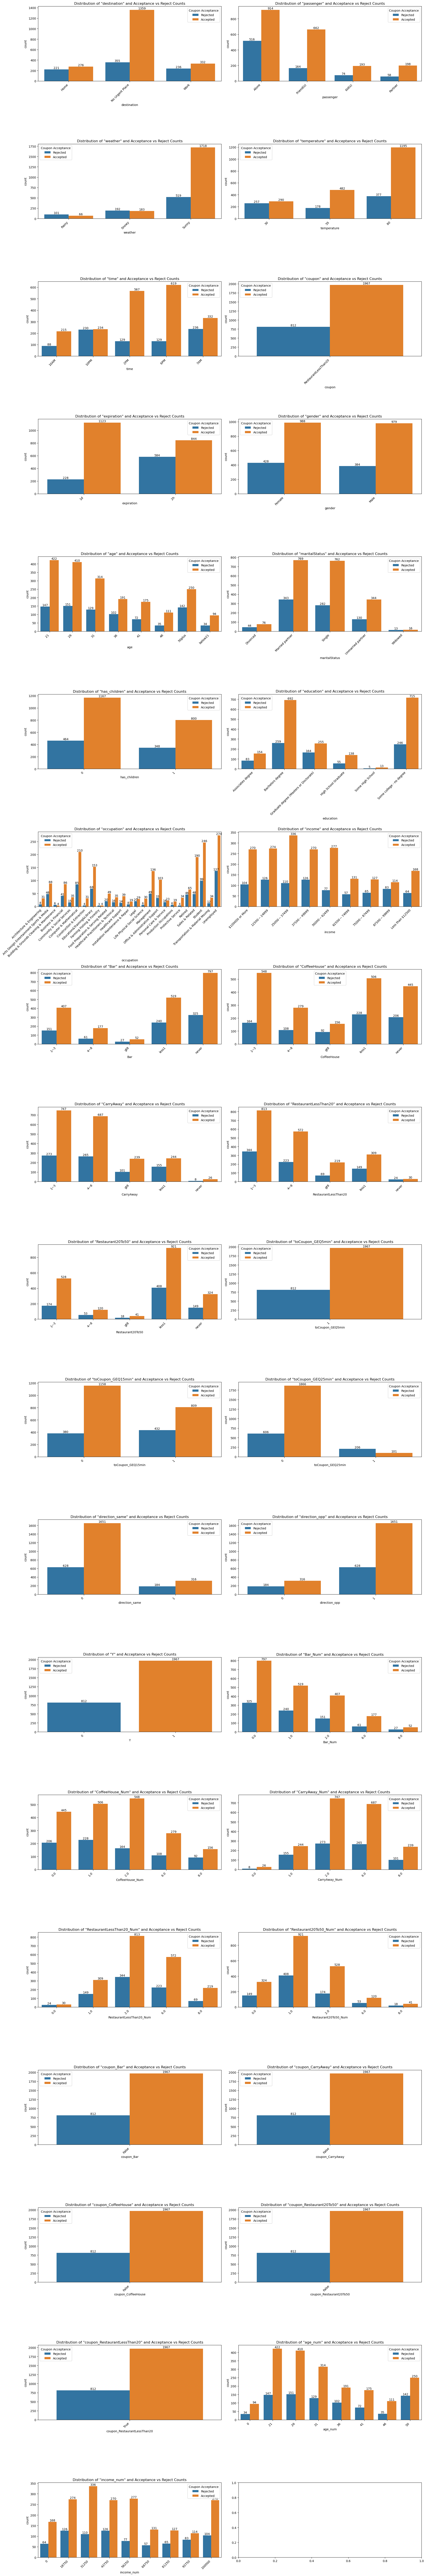

In [350]:
#Let's see if the other fields have any correlation to the coupon acceptance rate for RestaurantLessThan20 first.  

#All drivers with cheap restaurant coupon  
df_rest20 = data_mod[data_mod['coupon'] == 'RestaurantLessThan20']
#print(df_rest20.shape)

# Get all columns for counter bar ploting
cat_cols = df_rest20.select_dtypes(include=['object', 'category', 'Int64', 'Float64', 'bool']).columns
#print(cat_cols) 

import math

fig, axes = plt.subplots(math.ceil(cat_cols.size / 2), 2, figsize=(20, 120))
axes = axes.ravel()

#dynamically draw counter bar plots for categorical data to see acceptance vs rejects
for idx, col in enumerate(cat_cols):
 
    ax = sns.countplot(
        data=df_rest20,
        x=col,
        ax=axes[idx],
        hue='Y',
        order=df_rest20[col].value_counts().index.sort_values()   
    )
    
    ax.legend(title="Coupon Acceptance", labels=['Rejected', 'Accepted'])
    plt.sca(axes[idx])
    plt.xticks(rotation=45, ha='right')
    axes[idx].set_title(f'Distribution of "{col}" and Acceptance vs Reject Counts')

    for container in ax.containers:
        ax.bar_label(container)


plt.tight_layout()
plt.show()



In [320]:
#We can check the barplots to see which is likely to have higher acceptance rate for each category/field.
#mean % of overall accepance is a little over 70%. Condition must be higher than 70% to get more optimal grouping
 
df_rest20_groupby_clause = ((df_rest20['destination'] == 'No Urgent Place')                             #79.6%
                            & (df_rest20['passenger'] == 'Friend(s)')                                   #80.14%
                            & (df_rest20['weather'] == 'Sunny')                                         #80.30%
                            & (df_rest20['temperature'] >= 50)                                          #85.67%
                            & (df_rest20['expiration'] == '1d')                                         #95.43%
                            & (df_rest20['time'].isin(['2PM']))                                         #97.46%              
                            ) 


df_rest20_exp = df_rest20.groupby(df_rest20_groupby_clause)['Y'].mean() * 100
print(df_rest20_exp)
print(df_rest20.groupby(df_rest20_groupby_clause)['Y'].sum())
print(df_rest20.groupby(df_rest20_groupby_clause)['Y'].count())
 

df_rest20_groupby_clause2 = ((df_rest20['RestaurantLessThan20_Num'] > 3)                                 #73.23%
                            & (df_rest20['education'] == 'Some college - no degree')                     #77.16%
                            & (df_rest20['time'].isin(['2PM','6PM']))                                    #90.10%              
                            ) 


df_rest20_exp2 = df_rest20.groupby(df_rest20_groupby_clause2)['Y'].mean() * 100
print('-------------------')
print(df_rest20_exp2) 
print(df_rest20.groupby(df_rest20_groupby_clause2)['Y'].sum())
print(df_rest20.groupby(df_rest20_groupby_clause2)['Y'].count())

print('-------------------')
df_rest20_exp_or_combined = df_rest20.groupby(df_rest20_groupby_clause | df_rest20_groupby_clause2)['Y'].mean() * 100
print(df_rest20_exp_or_combined) 
print(df_rest20.groupby(df_rest20_groupby_clause | df_rest20_groupby_clause2)['Y'].sum())
print(df_rest20.groupby(df_rest20_groupby_clause | df_rest20_groupby_clause2)['Y'].count())


False    70.000000
True     97.468354
Name: Y, dtype: float64
False    1890
True       77
Name: Y, dtype: int64
False    2700
True       79
Name: Y, dtype: int64
-------------------
False    69.346734
True     90.104167
Name: Y, dtype: float64
False    1794
True      173
Name: Y, dtype: int64
False    2587
True      192
Name: Y, dtype: int64
-------------------
False    68.546465
True     92.337165
Name: Y, dtype: float64
False    1726
True      241
Name: Y, dtype: int64
False    2518
True      261
Name: Y, dtype: int64


In [327]:
#Within driver group who goes to cheap restaurance, if the do go 20to50, CarryAway, CoffeeHouse or Bar at least once, then they are likely also to accept the coupons for those with over 70% acceptance rate.

df_rest20_50 = df_rest20.groupby(df_rest20['Restaurant20To50_Num'] > 0)['Y'].mean()
print(df_rest20_50)
df_rest20_CarryAway = df_rest20.groupby(df_rest20['CarryAway_Num'] > 0)['Y'].mean()
print(df_rest20_CarryAway)
df_rest20_CoffeeHouse = df_rest20.groupby(df_rest20['CoffeeHouse_Num'] > 0)['Y'].mean()
print(df_rest20_CoffeeHouse)
df_rest20_Bar = df_rest20.groupby(df_rest20['Bar_Num'] > 0)['Y'].mean()
print(df_rest20_Bar)



Restaurant20To50_Num
False    0.691860
True     0.711445
Name: Y, dtype: float64
CarryAway_Num
False    0.735294
True     0.707119
Name: Y, dtype: float64
CoffeeHouse_Num
False    0.684814
True     0.715521
Name: Y, dtype: float64
Bar_Num
False    0.709170
True     0.706854
Name: Y, dtype: float64
